# Assignment 5: Epipolar geometry and triangulation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Exercise 1: Disparity

#### a) Derive teh expression for disparity which is defined as d = x1 - x2

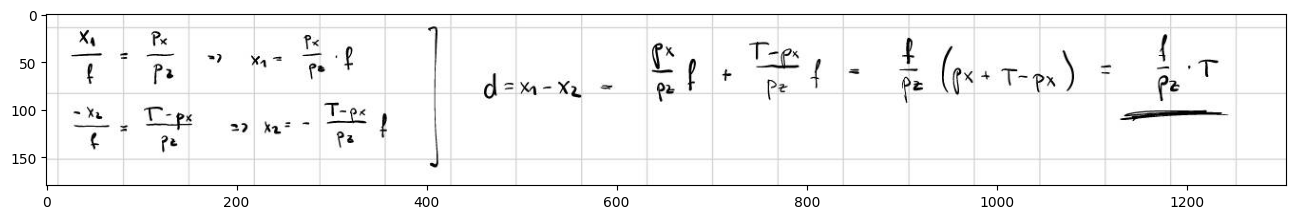

In [2]:
res = cv2.imread("1a.jpg")
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(res)


Disparity is inversely proportional to the z distance from the object - depth. When the object is close, disparity is high, when it is far, disparity is low (depth = high, disparity = low). 

#### b) Compute disparity for a range of values of p

Text(0, 0.5, 'disparity [cm]')

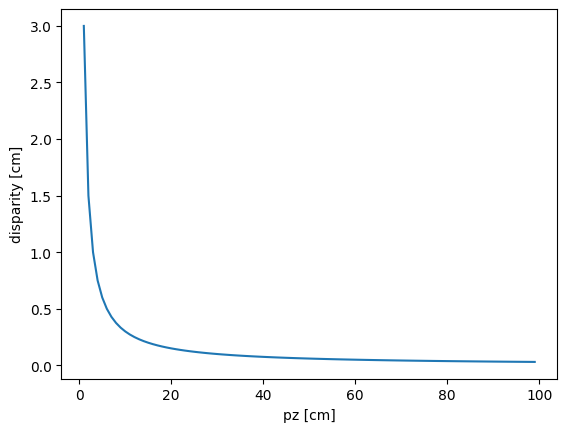

In [3]:
def disparity(z_coord, focal_length=.25, T_baseline=12):
    '''
        Computes disparity for a given z coordinate of a point, focal length and baseline are in cm
    '''
    if z_coord == 0:
        return np.inf
    return focal_length * T_baseline / z_coord

disparities = []
pz = [i for i in range(1, 100)]

for p in pz:
    disparities.append(disparity(p))
    
plt.plot(pz, disparities)
plt.xlabel("pz [cm]")
plt.ylabel("disparity [cm]")    # Or px if focal length is in pixels

#### c) Bumblebee2 disparity

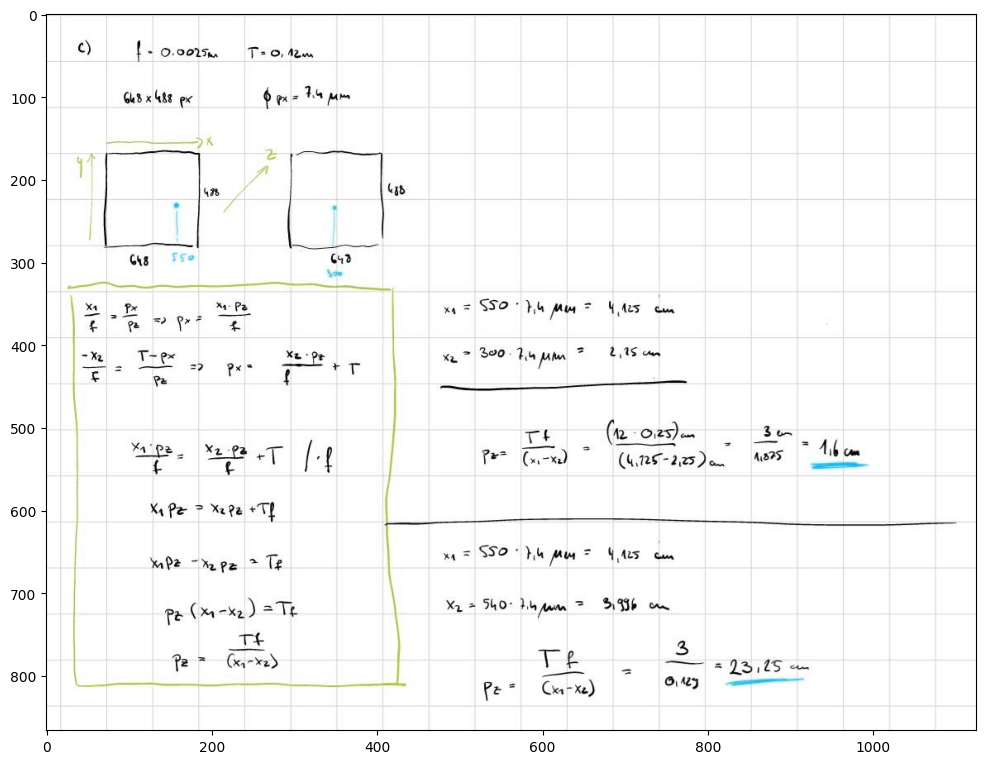

In [4]:
res = cv2.imread("1c.jpg")
fig, ax = plt.subplots(1,1,figsize=(12,12))

ax.imshow(res)

In [5]:
def hellinger(h1, h2):
    return np.sqrt(0.5 * np.sum(np.square(np.sqrt(h1) - np.sqrt(h2))))**2

#### d) Write a script that calculates the disparity for an image pair

In [462]:
def normalized_cross_correlation(matrix1, matrix2):
  # Ensure that the matrices have the same dimensions
  if matrix1.shape != matrix2.shape:
    return 0

  top = np.sum((matrix1 - matrix1.mean()) * (matrix2 - matrix2.mean()))
  bottom = matrix1.std() * matrix2.std() * matrix1.size
  return top / bottom

In [456]:
def get_ncc(img1: np.ndarray, img2: np.ndarray, patch_size=10, search_window=10) -> np.ndarray:
    rows, cols = img1.shape
    offset = patch_size//2
    disparity_map = np.zeros(img1.shape)
    
    # For every patch
    for i in range(rows):
        for j in range(cols):
            lpatch = img1[i - offset : i + offset+1, j - offset : j + offset+1]
            highest_ncc = 0.0
            matching_x = 0
            
            # Compare to every other patch in the search window
            for search_col in range(cols):
                rpatch = img2[i - offset : i + offset+1, search_col - offset : search_col + offset+1]
                
                ncc = normalized_cross_correlation(lpatch, rpatch)
                if ncc > float(highest_ncc):
                    highest_ncc = ncc
                    matching_x = search_col
            print(j, matching_x)
            disparity_map[i,j] = np.abs(j - matching_x)
            
    return disparity_map                   
            

In [470]:
def calc_disparity(img1, img2, patch_size, search_window_size):
  rows, cols = img1.shape
  
  patch_offset = (patch_size - 1) // 2
  disparity_map = np.zeros((rows, cols))
  
  for row in range(rows):
    for col in range(cols):
      print(row, col, sep=",")
      # get the patch from the first image
      patch1 = img1[max(0, row-patch_offset):min(rows, row+patch_offset+1), max(0, col-patch_offset):min(cols, col+patch_offset+1)]
      
      max_ncc = 0
      match_x = 0

      # search window      
      for search_col in range(col, min(cols, col+search_window_size)):
        patch2 = img2[max(0, row-patch_offset):min(rows, row+patch_offset+1), max(0, search_col-patch_offset):min(cols, search_col+patch_offset+1)]
        
        # calculate normalized cross correlation between the two patches
        ncc = normalized_cross_correlation(patch1, patch2)
        
        # if the normalized cross correlation value is higher than the current maximum, update the maximum and the matching point
        if ncc > max_ncc:
          max_ncc = ncc
          match_point = search_col
      
      # calculate the disparity as the difference in x axis between the point from the first image and the matching point from the second image
      disparity = col - match_point
      
      # store the disparity in the disparity map
      disparity_map[row, col] = disparity
  
  return disparity_map


In [458]:
def disparity1(img1: np.ndarray, img2: np.ndarray) -> np.ndarray:
    '''
        Calculates the disparity for an image pair
    '''
    return calc_disparity(img1, img2, 10, 35)

0,0
0,1
0,2
0,3
0,4
0,5
0,6
0,7
0,8
0,9
0,10
0,11
0,12
0,13
0,14
0,15
0,16
0,17
0,18
0,19
0,20
0,21
0,22
0,23
0,24
0,25
0,26
0,27
0,28
0,29
0,30
0,31
0,32
0,33
0,34
0,35
0,36
0,37
0,38
0,39
0,40
0,41
0,42
0,43
0,44
0,45
0,46
0,47
0,48
0,49
0,50
0,51
0,52
0,53
0,54
0,55
0,56
0,57
0,58
0,59
0,60
0,61
0,62
0,63
0,64
0,65
0,66
0,67
0,68
0,69
0,70
0,71
0,72
0,73
0,74
0,75
0,76
0,77
0,78
0,79
0,80
0,81
0,82
0,83
0,84
0,85
0,86
0,87
0,88
0,89
0,90
0,91
0,92
0,93
0,94
0,95
0,96
0,97
0,98
0,99
0,100
0,101
0,102
0,103
0,104
0,105
0,106
0,107
0,108
0,109
0,110
0,111
0,112
0,113
0,114
0,115
0,116
0,117
0,118
0,119
0,120
0,121
0,122
0,123
0,124
0,125


/tmp/ipykernel_29057/3339452857.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return top / bottom


0,126
0,127
0,128
0,129
0,130
0,131
0,132
0,133
0,134
0,135
0,136
0,137
0,138
0,139
0,140
0,141
0,142
0,143
0,144
0,145
0,146
0,147
0,148
0,149
0,150
0,151
0,152
0,153
0,154
0,155
0,156
0,157
0,158
0,159
0,160
0,161
0,162
0,163
0,164
0,165
0,166
0,167
0,168
0,169
0,170
0,171
0,172
0,173
0,174
0,175
0,176
0,177
0,178
0,179
0,180
0,181
0,182
0,183
0,184
0,185
0,186
0,187
0,188
0,189
0,190
0,191
0,192
0,193
0,194
0,195
0,196
0,197
0,198
0,199
0,200
0,201
0,202
0,203
0,204
0,205
0,206
0,207
0,208
0,209
0,210
0,211
0,212
0,213
0,214
0,215
0,216
0,217
0,218
0,219
0,220
0,221
0,222
0,223
0,224
0,225
0,226
0,227
0,228
0,229
0,230
0,231
0,232
0,233
0,234
0,235
0,236
0,237
0,238
0,239
0,240
0,241
0,242
0,243
0,244
0,245
0,246
0,247
0,248
0,249
0,250
0,251
0,252
0,253
0,254
0,255
0,256
0,257
0,258
0,259
0,260
0,261
0,262
0,263
0,264
0,265
0,266
0,267
0,268
0,269
0,270
0,271
0,272
0,273
0,274
0,275
0,276
0,277
0,278
0,279
0,280
0,281
0,282
0,283
0,284
0,285
0,286
0,287
0,288
0,289
0,290
0,291
0,29

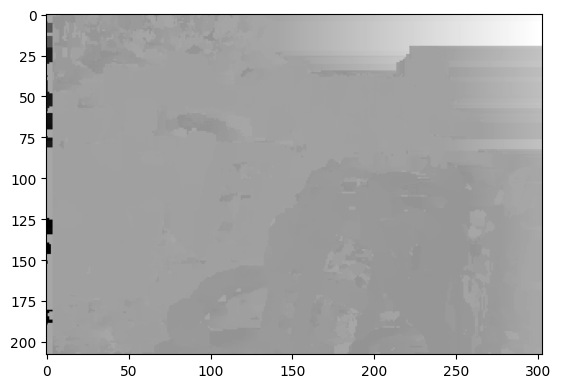

In [471]:
img_office1 = cv2.imread("data/disparity/office_left.png")
img_office2 = cv2.imread("data/disparity/office_right.png")

img_office1 = cv2.cvtColor(img_office1, cv2.COLOR_BGR2GRAY)
img_office1 = cv2.resize(img_office1, dsize=(img_office1.shape[1]//2, img_office1.shape[0]//2))
img_office2 = cv2.cvtColor(img_office2, cv2.COLOR_BGR2GRAY)
img_office2 = cv2.resize(img_office2, dsize=(img_office2.shape[1]//2, img_office2.shape[0]//2))

d = disparity1(img_office1, img_office2)
plt.imshow(d, cmap="gray")

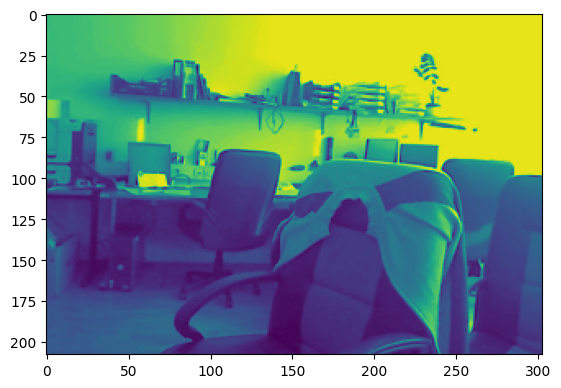

In [254]:
rows, cols = img_office1.shape

disparity_map = np.zeros((rows, cols))
plt.imshow(img_office1)


### Exercise 2: Fundamental matrix, epipoles, epipolar lines

#### a) Analytically compute the equation of the epipolar line

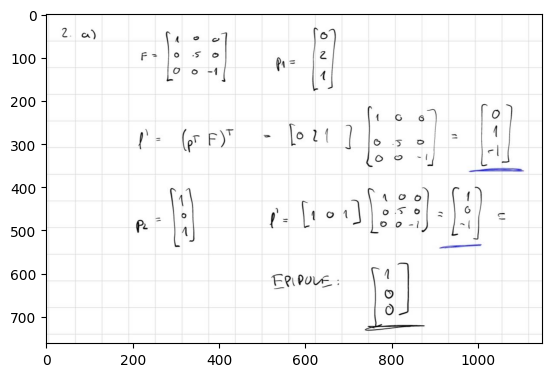

In [10]:
plt.imshow(cv2.imread("2a.jpg"))

#### b) Fundamental matrix estimation

In [11]:
def get_A(points1: np.ndarray, points2: np.ndarray) -> np.ndarray:
    A = []
    for p1, p2 in zip(points1, points2):
        x1, y1, z1 = p1
        x2, y2, z2 = p2
        
        row = [x1*x2, x2*y1, x2, x1*y2, y1*y2, y2, x1, y1, 1]
        A.append(row)
    A = np.array(A)
    return A
    

In [12]:
from a5_utils import *

def fundamental_matrix(points1: np.ndarray, points2: np.ndarray) -> np.ndarray:
    '''
        Computes an estimation of the fundamental matrix F, needs at least 8 pairs of points as input
    '''

    points1, T1 = normalize_points(points1)        
    points2, T2 = normalize_points(points2)        
    
    # Compute F'
    A = get_A(points1, points2)
    
    U, D, VT = np.linalg.svd(A)
    
    F = VT[-1]
    F = np.reshape(F, (3,3))

    # Enforce the constraint
    U, D, VT = np.linalg.svd(F) # This returns singular values in a vector, not a matrix

    D = np.array([[D[0], 0, 0],
                  [0, D[1], 0],
                  [0, 0, D[2]]])

    D[2,2] = 0

    F = np.matmul(U, np.matmul(D, VT))
    
    
    # F = T2.T * F' * T1
    F = np.matmul(T2.T, np.matmul(F, T1))
    return F

In [13]:
def get_epipoles(F: np.ndarray) -> np.ndarray:
    '''
        Computes both epipolar lines by SVD of the fundamental matrix
    '''
    U,D,VT = np.linalg.svd(F)
    
    e1 = VT[-1] / VT[-1, -1]
    e2 = U[-1] / U[-1, -1]
    
    return e1, e2
    

2


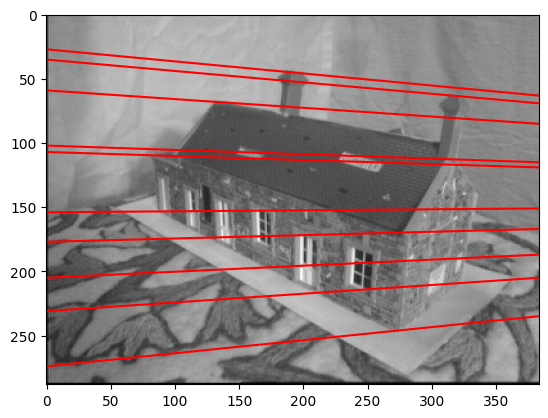

In [14]:
pts = np.loadtxt("data/epipolar/house_points.txt")
points1, points2 = [], []

for row in pts:
    points1.append((row[0], row[1]))
    points2.append((row[2], row[3]))
points1 = np.array(points1)
points2 = np.array(points2)

F = fundamental_matrix(points1, points2)
print(np.linalg.matrix_rank(F))

house1 = cv2.imread("data/epipolar/house1.jpg")
house1 = cv2.cvtColor(house1, cv2.COLOR_BGR2GRAY)

house2 = cv2.imread("data/epipolar/house2.jpg")
house2 = cv2.cvtColor(house2, cv2.COLOR_BGR2GRAY)

# Compute epipolar lines
epi1, epi2 = get_epipoles(F)


for p in points2:
    p = np.array([p[0], p[1], 1])
    
    epiline2 = np.matmul(p.T, F).T
    draw_epiline(epiline2, house2.shape[0], house2.shape[1])
    plt.imshow(house1, cmap="gray")
    


#draw_epiline(get_epipolar_lines(points1[0], epi1), house2.shape[0], house2.shape[1])
#ax[1].imshow(house2, cmap="gray")

    

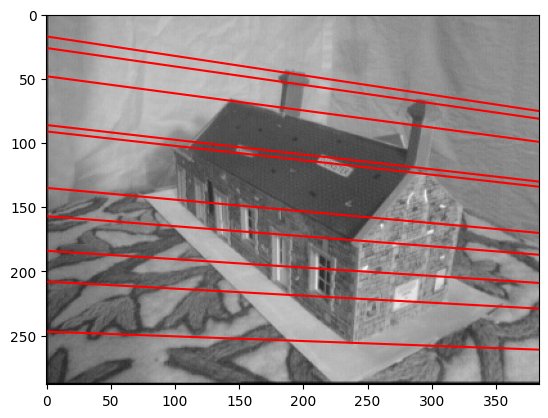

In [15]:
for p in points1:
    p = np.array([p[0], p[1], 1])
    epiline1 = np.matmul(F, p)
    draw_epiline(epiline1, house1.shape[0], house1.shape[1])
    plt.imshow(house2, cmap="gray")

#### c) Reprojection error

In [16]:
def distance(line: np.ndarray, point: tuple) -> float:
    return np.abs(line[0] * point[0] + line[1] * point[1] + line[2]) / np.sqrt(np.square(line[0]) + np.square(line[1]))

In [17]:
def reprojection_error(p1: tuple, p2: tuple, F: np.ndarray) -> float:
    pt1 = np.array([p1[0], p1[1], 1])
    pt2 = np.array([p2[0], p2[1], 1])
    
    # Point 1
    epiline1 = np.matmul(F, pt1)
    dist1 = distance(epiline1, p2)
    #print(epiline1, p1, dist1)
    
    epiline2 = np.matmul(pt2.T, F).T
    dist2 = distance(epiline2, p1)
    #print(epiline2, p2, dist2)    
    
    return np.average([dist1, dist2])
    
    

In [18]:
# (1)
err = reprojection_error((85, 233), (67, 219), F)
print(err)

0.14674365570458087


In [19]:
hpoints = np.loadtxt("data/epipolar/house_points.txt")
pts1, pts2 = [], []

for row in hpoints:
    pts1.append((row[0], row[1]))
    pts2.append((row[2], row[3]))
    
errors = []
for pt1, pt2 in zip(pts1, pts2):
    errors.append(reprojection_error(pt1, pt2, F))

error = np.average(errors)
print(error)

0.33091336980543307


#### d) Fully automatic fundamental matrix estimation

In [106]:
def get_matches(descriptors1, descriptors2):
    descriptors1 = descriptors1.astype(np.uint8)
    descriptors2 = descriptors2.astype(np.uint8)
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
    return matcher.match(descriptors1, descriptors2)

In [303]:
def get_correspondences(img1, img2):
    sift = cv2.SIFT_create(500)
    
    kpoints1, descriptors1 = sift.detectAndCompute(img1, None)
    kpoints2, descriptors2 = sift.detectAndCompute(img2, None)
    
    #matches = match_keypoints(descriptors1, descriptors2)
    matches = get_matches(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    matches1, matches2 = [], []
    for m in matches:
        matches1.append(kpoints1[m.queryIdx].pt)
        matches2.append(kpoints2[m.trainIdx].pt)
    
    #fig, ax = plt.subplots(1,1,figsize=(20,10))
    #img3 = cv2.drawMatches(img1, kpoints1, img2, kpoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #ax.imshow(img3)
    
    return np.array(matches1), np.array(matches2)

In [305]:
def get_inliers(correspondences, F, thresh=15):
    pts1, pts2 = correspondences
   
    inliers = []
    
    for pt1, pt2 in zip(pts1, pts2):
        dist = reprojection_error((pt1[0],pt1[1]), (pt2[0],pt2[1]), F)
        
        if dist < thresh:
            inliers.append((pt1, pt2))
        
    return inliers, len(inliers)    

In [423]:
def ransac(points, dist_threshold=14, inlier_threshold=70, n_iter=50):
    
    inliers = []
    best_inliers = []
    best_F = []
    max_inliers = 0
    pts1, pts2 = points
    
    for i in range(n_iter):

        # Choose a random subset
        if len(inliers) < 8:
            indices = np.random.randint(pts1.shape[0], size=8)
            correspondences = np.array([pts1[indices], pts2[indices]])
        else:
            indices = np.random.randint(inliers[0].shape[0], size=8)
            correspondences = np.array([inliers[0][indices], inliers[1][indices]])        
                
        # Estimate F
        F = fundamental_matrix(correspondences[0], correspondences[1])
        if len(best_F) == 0:
            best_F = F
        
        # Determine inliers
        inliers, n_inliers = get_inliers(correspondences, F)
        inliers = np.array(inliers)
        
        if n_inliers > inlier_threshold:
            if n_inliers > max_inliers:
                max_inliers = n_inliers
                best_inliers = inliers
                best_F = F
    
    
    if len(best_inliers) >= 8:
        best_F = fundamental_matrix(pts1, pts2)
    return best_F
    
    
    

In [428]:
def estimate_fundamental_matrix(img1, img2):
    # Detect correspondeces
    pts1, pts2 = get_correspondences(img1, img2)
    
    #correspondences = np.array([pts1, pts2]) # [[[x1, y1], [...]], [x2, y2], [....]]]
    
    F = ransac(correspondences)    
    return pts1, pts2, F

500


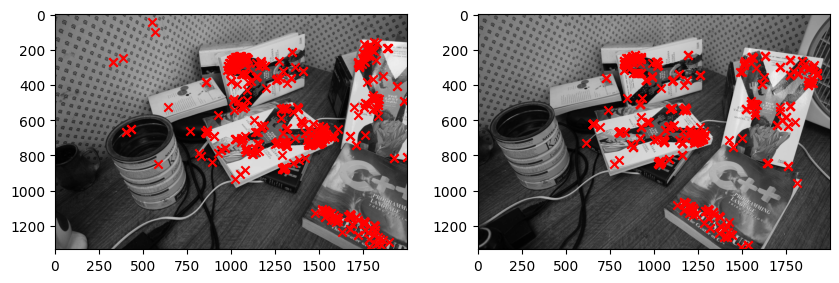

In [432]:
%matplotlib inline
img1 = cv2.imread("data/desk/DSC02638.JPG")
img2 = cv2.imread("data/desk/DSC02639.JPG")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,2, figsize=(10,10))

pts1, pts2, F = estimate_fundamental_matrix(img1, img2)

xs1 = list(map(lambda x: x[0], pts1))
ys1 = list(map(lambda x: x[1], pts1))

ax[0].scatter(xs1, ys1, marker="x", c="red")
ax[0].imshow(img1, cmap="gray")
print(len(xs1))
xs2 = list(map(lambda x: x[0], pts2))
ys2 = list(map(lambda x: x[1], pts2))

ax[1].scatter(xs2, ys2, marker="x", c="red")
ax[1].imshow(img2, cmap="gray")

# Compute epipolar lines
epi1, epi2 = get_epipoles(F)

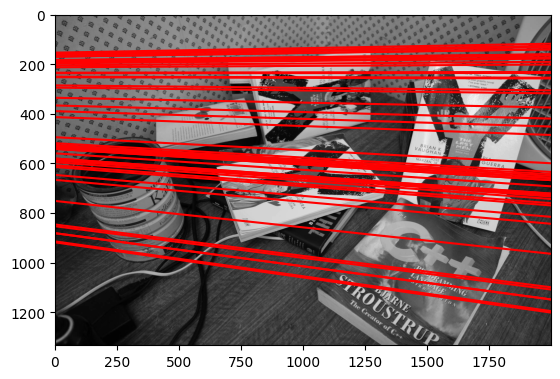

In [433]:
i = 0
for p in pts1:
    p = np.array([p[0], p[1], 1])
    epiline2 = np.matmul(p.T, F).T
    if i % 10 == 0:
        draw_epiline(epiline2, img2.shape[0], img2.shape[1])
    i += 1
plt.imshow(img2, cmap="gray")
    

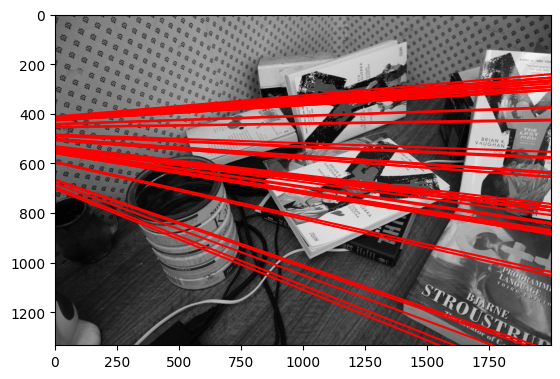

In [434]:
i = 0
for p in pts2:
    p = np.array([p[0], p[1], 1])
    epiline1 = np.matmul(F, p)
    if i % 10 == 0:
        draw_epiline(epiline1, img1.shape[0], img1.shape[1])
    i += 1
plt.imshow(img1, cmap="gray")

### Exercise 3: Triangulation

#### a) Triangulation

In [123]:
def get_A1(x1: tuple, x2: tuple, P1: np.ndarray, P2: np.ndarray) -> np.ndarray:
    
    x1 = np.array([[0, -1, x1[1]],
                   [1, 0, -x1[0]],
                   [-x1[1], x1[0], 0]])    
    
    x2 = np.array([[0, -1, x2[1]],
                   [1, 0, -x2[0]],
                   [-x2[1], x2[0], 0]])    
        
    
    upper_half = np.matmul(x1, P1)[:3]
    bottom_half = np.matmul(x2, P2)[:3]

    A = np.concatenate((upper_half, bottom_half))
    return A

In [124]:
def triangulate(points: np.ndarray, projection_matrices: np.ndarray) -> np.ndarray:
    #     [ [X1x]P1 ]
    # A = [ [X2x]P2 ]
    #
    points_3d = []
    pts1, pts2 = points
    P1, P2 = projection_matrices
    
    for pt1, pt2 in zip(pts1, pts2):
        A = get_A1(pt1, pt2, P1, P2)
        U, D, VT = np.linalg.svd(A)
        
        X = VT[-1]
        X /= X[3]
        
        points_3d.append(X)
    
    return points_3d

True


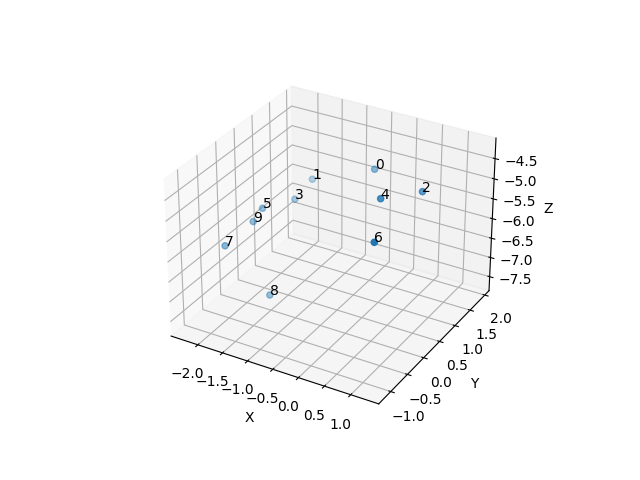

In [125]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

P1 = np.loadtxt("data/epipolar/house1_camera.txt")
P2 = np.loadtxt("data/epipolar/house2_camera.txt")

hpoints = np.loadtxt("data/epipolar/house_points.txt")
pts1, pts2 = [], []

for row in hpoints:
    pts1.append((row[0], row[1]))
    pts2.append((row[2], row[3]))
   
points_3d = triangulate([pts1, pts2], [P1, P2])

T = np.array([[-1,0,0],
              [0,0,1],
              [0,-1,0]])

xs, ys, zs = [], [], []
for point in points_3d:
    xs.append(point[0])
    ys.append(point[1])
    zs.append(point[2])

#fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': '3d'})

plt.ion()
print(plt.isinteractive())
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
i = 0
for point in points_3d:
    ax.text(point[0], point[1], point[2], f"{i}")
    i += 1
    

ax.scatter(xs, ys, zs)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

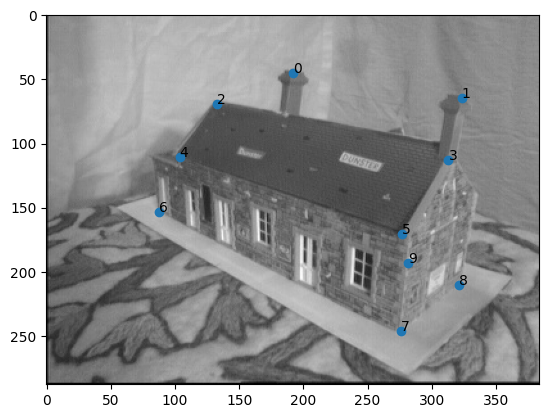

In [126]:
pts1_x = [] 
pts1_y = []

%matplotlib inline
i = 0
for pt in pts1:
    pts1_x.append(pt[0])
    pts1_y.append(pt[1])
    plt.text(pt[0], pt[1], i)  
    i+=1  
    
plt.scatter(pts1_x, pts1_y)
plt.imshow(house1, cmap="gray")

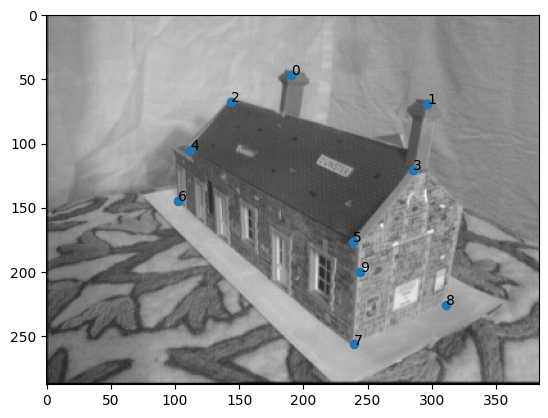

In [127]:
pts2_x = [] 
pts2_y = []

i = 0
for pt in pts2:
    pts2_x.append(pt[0])
    pts2_y.append(pt[1])
    plt.text(pt[0], pt[1], i)  
    i+=1  
    
plt.scatter(pts2_x, pts2_y)
plt.imshow(house2, cmap="gray")